## UAS MACHINE LEARNING

## NAMA  : Wira Dwi Susanto
## NIM   : 17.01.53.0053
## Kelas : A1

# CLUSTERING

# Proyeksi Penduduk menurut Provinsi, 2010-2035
# https://www.bps.go.id/statictable/2014/02/18/1274/proyeksi-penduduk-menurut-provinsi-2010---2035.html

In [36]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


# Pertama, lakukan *import* *library*/kebutuhan yang diperlukan di Python

In [37]:
pip install xlrd 

Note: you may need to restart the kernel to use updated packages.


In [38]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Untuk import library yang diperlukan di Python

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

# Import datasetnya menggunakan fungsi pandas pd.read_excel()

In [40]:
import_datanya = pd.read_excel("Proyeksi Penduduk menurut Provinsi_3.xls")

# Coba kita tampilkan data dari dataset 5 paling teratas

In [41]:
import_datanya.head(5)

,Provinsi,2010,2015,2020,2025,2030,2035
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Aceh,4523.1,5002.0,5459.9,5870.0,6227.6,6541.4
2,Sumatera Utara,13028.7,13937.8,14703.5,15311.2,15763.7,16073.4
3,Sumatera Barat,4865.3,5196.3,5498.8,5757.8,5968.3,6130.4
4,Riau,5574.9,6344.4,7128.3,7898.5,8643.3,9363.0


# Coba menampilkan informasi datatype pada dataset, terdiri dari object dan float64

In [42]:
import_datanya.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Provinsi  33 non-null     object 
 1   2010      33 non-null     float64
 2   2015      33 non-null     float64
 3   2020      33 non-null     float64
 4   2025      33 non-null     float64
 5   2030      33 non-null     float64
 6   2035      33 non-null     float64
dtypes: float64(6), object(1)
memory usage: 2.0+ KB


# Perlu dilakukan drop pada atribut dataset yang memiliki value NaN (tidak mempunyai nilai). Untuk melakukannya, gunakan fungsi dropna()

In [43]:
import_datanya.dropna()

,Provinsi,2010,2015,2020,2025,2030,2035
1,Aceh,4523.1,5002.0,5459.9,5870.0,6227.6,6541.4
2,Sumatera Utara,13028.7,13937.8,14703.5,15311.2,15763.7,16073.4
3,Sumatera Barat,4865.3,5196.3,5498.8,5757.8,5968.3,6130.4
4,Riau,5574.9,6344.4,7128.3,7898.5,8643.3,9363.0
5,Jambi,3107.6,3402.1,3677.9,3926.6,4142.3,4322.9
6,Sumatera Selatan,7481.6,8052.3,8567.9,9000.4,9345.2,9610.7
7,Bengkulu,1722.1,1874.9,2019.8,2150.5,2264.3,2360.6
8,Lampung,7634.0,8117.3,8521.2,8824.6,9026.2,9136.1
9,Kepulauan Bangka Belitung,1230.2,1372.8,1517.6,1657.5,1788.9,1911.0
10,Kepulauan Riau,1692.8,1973.0,2242.2,2501.5,2768.5,3050.5


# Gunakan fungsi shape untuk menampilkan banyaknya elemen di setiap dimensi array

In [44]:
import_datanya.shape

(34, 7)

# Hapus kolom variable yang tidak diperlukan

In [45]:
data = import_datanya.drop(['Provinsi'], axis = 1)
data.head()

,2010,2015,2020,2025,2030,2035
0,NaN,NaN,NaN,NaN,NaN,NaN
1,4523.1,5002.0,5459.9,5870.0,6227.6,6541.4
2,13028.7,13937.8,14703.5,15311.2,15763.7,16073.4
3,4865.3,5196.3,5498.8,5757.8,5968.3,6130.4
4,5574.9,6344.4,7128.3,7898.5,8643.3,9363.0


# Lakukan cleansing pada data yang masih mempunyai value NaN (untuk memastikan). Kita akan menghapusnya.

In [46]:
data.dropna(how='any') 

,2010,2015,2020,2025,2030,2035
1,4523.1,5002.0,5459.9,5870.0,6227.6,6541.4
2,13028.7,13937.8,14703.5,15311.2,15763.7,16073.4
3,4865.3,5196.3,5498.8,5757.8,5968.3,6130.4
4,5574.9,6344.4,7128.3,7898.5,8643.3,9363.0
5,3107.6,3402.1,3677.9,3926.6,4142.3,4322.9
6,7481.6,8052.3,8567.9,9000.4,9345.2,9610.7
7,1722.1,1874.9,2019.8,2150.5,2264.3,2360.6
8,7634.0,8117.3,8521.2,8824.6,9026.2,9136.1
9,1230.2,1372.8,1517.6,1657.5,1788.9,1911.0
10,1692.8,1973.0,2242.2,2501.5,2768.5,3050.5


In [47]:
X = pd.DataFrame(data.dropna(how='any'))
X.head()

,2010,2015,2020,2025,2030,2035
1,4523.1,5002.0,5459.9,5870.0,6227.6,6541.4
2,13028.7,13937.8,14703.5,15311.2,15763.7,16073.4
3,4865.3,5196.3,5498.8,5757.8,5968.3,6130.4
4,5574.9,6344.4,7128.3,7898.5,8643.3,9363.0
5,3107.6,3402.1,3677.9,3926.6,4142.3,4322.9


# Menggambarkan deskripsi dataset

In [48]:
X.describe()

,2010,2015,2020,2025,2030,2035
count,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000
mean,7227.842424,7741.263636,8214.133333,8631.181818,8981.972727,9262.193939
std,10321.298869,10884.939600,11391.291418,11825.213286,12168.684163,12407.723293
min,765.300000,871.500000,981.800000,1092.200000,1200.100000,1305.000000
25%,2220.800000,2412.100000,2528.800000,2624.300000,2768.500000,3050.500000
50%,3642.600000,4068.600000,4380.800000,4586.000000,4814.200000,5016.300000
75%,7481.600000,8052.300000,8521.200000,8824.600000,9026.200000,9363.000000
max,43227.100000,46709.600000,49935.700000,52785.700000,55193.800000,57137.300000


# Kita coba gunakan fungsi tail() untuk melihat ekor data pada dataset yang digunakan.

In [49]:
X.tail()

,2010,2015,2020,2025,2030,2035
29,1164.6,1282.2,1405.0,1527.8,1647.2,1763.3
30,1541.9,1686.5,1831.9,1972.7,2104.2,2227.8
31,1043.3,1162.3,1278.8,1391.0,1499.4,1603.6
32,765.3,871.5,981.8,1092.2,1200.1,1305.0
33,2857.0,3149.4,3435.4,3701.7,3939.4,4144.6


# Di sini akan menebak jumlah *cluster* yang dibutuhkan

In [50]:
scr=[]
for i in range (1, 33):
    score = KMeans(n_clusters=i).fit(X).score(X)
    print(score)
    scr.append(score)

-25492377005.463634
-3050421507.223333
-1434026915.8367286
-680672414.0700623
-397074733.8020393
-181888258.81693938
-115689540.41693938
-73630378.37050001
-48487649.78749999
-32732088.994
-23517075.902333338
-16900453.747333333
-12074156.849666664
-7933662.79933333
-6395292.201333331
-4974459.191333333
-3821794.8879999993
-3086774.0583333327
-2466189.6100000013
-2032901.475000001
-1667149.3650000007
-1277390.0950000007
-920356.5950000002
-660644.7150000003
-466872.9900000003
-329943.2150000003
-240866.3650000003
-152100.08500000022
-94188.97500000012
-52235.60000000011
-44986.92000000019
-4122.820000000031


# Ambil nilai di tengah-tengah lekukan untuk nilai *cluster* yakni = 5. Kita gambarkan menggunakan matplotlib

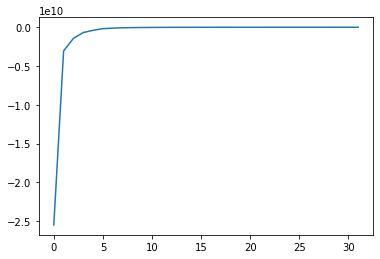

In [51]:
plt.plot(scr)

# Ubah variabel yang sebelumnya berbentuk *dataframe* menjadi sebuah array

In [52]:
x_array = np.array(X)
print(x_array)

[[ 4523.1  5002.   5459.9  5870.   6227.6  6541.4]
 [13028.7 13937.8 14703.5 15311.2 15763.7 16073.4]
 [ 4865.3  5196.3  5498.8  5757.8  5968.3  6130.4]
 [ 5574.9  6344.4  7128.3  7898.5  8643.3  9363. ]
 [ 3107.6  3402.1  3677.9  3926.6  4142.3  4322.9]
 [ 7481.6  8052.3  8567.9  9000.4  9345.2  9610.7]
 [ 1722.1  1874.9  2019.8  2150.5  2264.3  2360.6]
 [ 7634.   8117.3  8521.2  8824.6  9026.2  9136.1]
 [ 1230.2  1372.8  1517.6  1657.5  1788.9  1911. ]
 [ 1692.8  1973.   2242.2  2501.5  2768.5  3050.5]
 [ 9640.4 10177.9 10645.  11034.  11310.  11459.6]
 [43227.1 46709.6 49935.7 52785.7 55193.8 57137.3]
 [10688.6 11955.2 13160.5 14249.  15201.8 16033.1]
 [32443.9 33774.1 34940.1 35958.6 36751.7 37219.4]
 [ 3467.5  3679.2  3882.3  4064.6  4220.2  4348.5]
 [37565.8 38847.6 39886.3 40646.1 41077.3 41127.7]
 [ 3907.4  4152.8  4380.8  4586.   4765.4  4912.4]
 [ 4516.1  4835.6  5125.6  5375.6  5583.8  5754.2]
 [ 4706.2  5120.1  5541.4  5970.8  6402.2  6829.1]
 [ 4411.4  4789.6  5134.8  5432

# Lakukan *scaling* data dari *array*

In [53]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x_array)
x_scaled

array([[0.08849837, 0.09011063, 0.09147586, 0.09242555, 0.09311272,
        0.093788  ],
       [0.28881018, 0.28505326, 0.2802984 , 0.2750636 , 0.26972776,
        0.26451355],
       [0.09655738, 0.09434946, 0.09227048, 0.09025506, 0.0883103 ,
        0.08642667],
       [0.11326887, 0.11939631, 0.1255569 , 0.13166646, 0.13785312,
        0.14432506],
       [0.05516252, 0.05520735, 0.05507426, 0.05483088, 0.05449154,
        0.05405294],
       [0.15817276, 0.15665571, 0.15496416, 0.15298248, 0.15085278,
        0.14876156],
       [0.02253319, 0.02189009, 0.02120362, 0.02047259, 0.01970971,
        0.01890662],
       [0.16176187, 0.15807374, 0.1540102 , 0.14958167, 0.14494469,
        0.1402611 ],
       [0.01094866, 0.01093632, 0.01094499, 0.01093561, 0.01090498,
        0.01085393],
       [0.02184316, 0.02403023, 0.02574667, 0.02726262, 0.02904783,
        0.03126327],
       [0.20901375, 0.20302761, 0.19739387, 0.19232205, 0.18724222,
        0.1818768 ],
       [1.        , 1

# # Tentukan jumlah *cluster*-nya, misalnya di sini ada 5 *cluster*
# Gunakan fungsi *library* K-Means pada Python

In [54]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

KMeans(n_clusters=5)

# Cari nilai pusat/*centroid* dari masing masing *cluster*

In [55]:
print(kmeans.cluster_centers_)

[[ 5241.59166667  5682.425       6096.03333333  6466.73333333
   6789.50833333  7066.40833333]
 [35004.85       36310.85       37413.2        38302.35
  38914.5        39173.55      ]
 [11119.23333333 12023.63333333 12836.33333333 13531.4
  14091.83333333 14522.03333333]
 [43227.1        46709.6        49935.7        52785.7
  55193.8        57137.3       ]
 [ 1935.01333333  2124.69333333  2309.52666667  2482.90666667
   2642.18        2787.        ]]


# Tampilkan hasil *clustering* dan tambahkan kolom *clustering* ke dalam *dataframe*

In [56]:
print(kmeans.labels_)
    
# Menambahkan kolom "cluster" dalam dataframe
X["cluster"] = kmeans.labels_
X.head()

[0 2 0 0 4 0 4 0 4 4 2 3 2 1 4 1 0 0 0 0 4 0 0 4 4 0 4 4 4 4 4 4 4]


,2010,2015,2020,2025,2030,2035,cluster
1,4523.1,5002.0,5459.9,5870.0,6227.6,6541.4,0
2,13028.7,13937.8,14703.5,15311.2,15763.7,16073.4,2
3,4865.3,5196.3,5498.8,5757.8,5968.3,6130.4,0
4,5574.9,6344.4,7128.3,7898.5,8643.3,9363.0,0
5,3107.6,3402.1,3677.9,3926.6,4142.3,4322.9,4


# Coba lakukan visualisasi pembagian hasil *cluster*

(array([12.,  0.,  2.,  0.,  0.,  3.,  0.,  1.,  0., 15.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

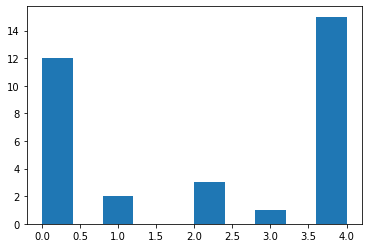

In [57]:
plt.hist(X["cluster"])

# Lakukan visualisasi pengelompokan *cluster*. Untuk melakukannya, bisa digunakan fungsi *seaborn* pada Python dan maka hasilnya akan seperti di bawah ini.

<Figure size 432x288 with 0 Axes>

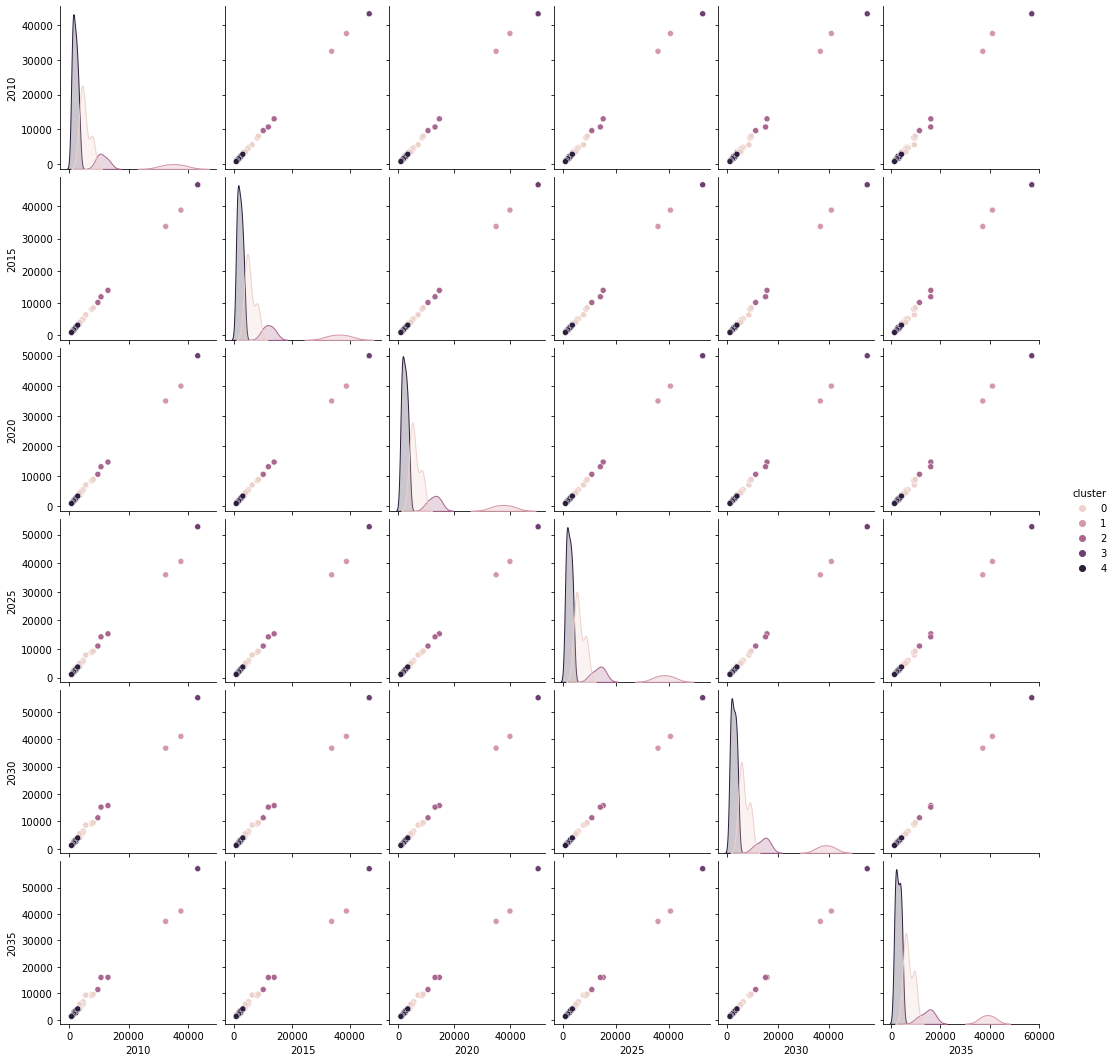

In [58]:
plt.figure()
sns.pairplot(X, hue="cluster", dropna=True)
plt.show()

# Dari gambar di atas, maka dapat kita lihat bahwa dari data Proyeksi Penduduk menurut Provinsi, 2010-2035 telah dicluster menjadi 5